In [1]:
import wfdb
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.signal import resample_poly
import pandas as pd

In [9]:
x=np.arange(0,100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [34]:
fs1=250
fs2=128
t1=0.25
t2=0.5

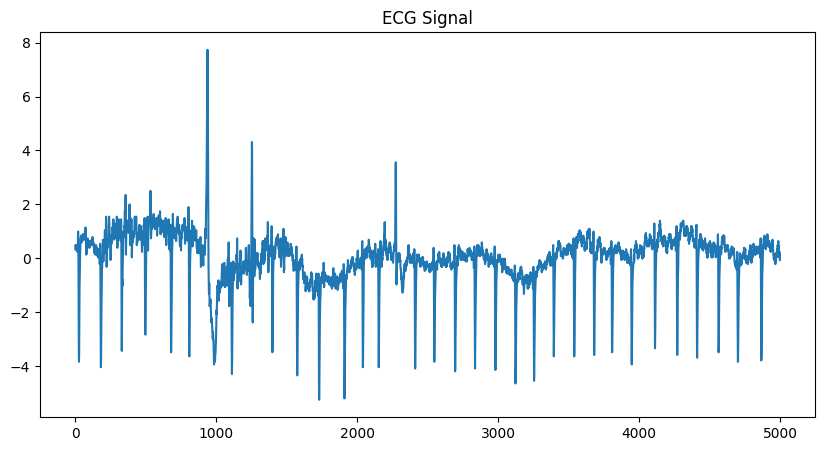

In [33]:
record = wfdb.rdrecord('D:/学习/毕业设计/data/abnormal/07859', # 文件所在路径
                       sampfrom=10000,
                       sampto=15000,
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channel_names=['ECG1']) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']

# 转为数字信号
signal = record.d_signal
signal = stats.zscore(signal)
#print(signal)
# 绘制波形
plt.figure(num=None, figsize=(10, 5))
plt.plot(signal)
plt.title("ECG Signal")

# ======
# 读取annatations
# signal_ann = wfdb.rdann("D:/学习/毕业设计/data/abnormal/07859", "qrs-",sampfrom=0,sampto=1000)
# print(signal_ann.aux_note)
# print(signal_ann.sample)
# print("length",len(signal_ann.sample))
# # 将读取到的annatations的心拍绘制到心电图上
# for index in signal_ann.sample:
#     # print(index)
#     plt.scatter(index, signal[index][0], marker="*")

# 并打印出改心拍标注的类型
# print(signal_ann.symbol)
# print(signal_ann.aux_note)
plt.show()

In [7]:
signal.reshape(384)
signal_res= pd.DataFrame(signal)
signal_res.to_csv('D:/学习/毕业设计/data/test_data/abnormal_sample1.csv',index=False)

In [28]:
sampling_rate = 128
def checkR(ecg):
    max_val = np.max(ecg)
    min_val = np.min(ecg)
    threshold_val = (max_val-min_val)*0.7 + min_val
    index = []
    for i in range(1, len(ecg)-2):
        # 满足差分阈值条件
        if ecg[i] == np.max(ecg[i-1:i+2]) and ecg[i] > threshold_val:
            # 满足心率间隔60-160
            if index != []:
                if i-index[-1] <= 60.0/60.0*sampling_rate and i-index[-1] >= 60.0/160.0*sampling_rate:
                    index.append(i)
            else:
                index.append(i)
    return np.array(index)

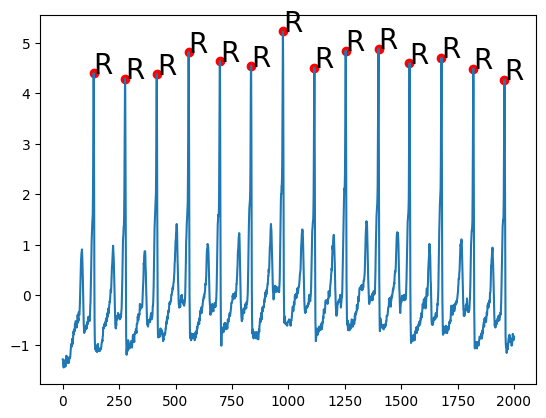

In [25]:
index = checkR(signal)
# 检查R波检测是否正确
plt.figure()
plt.plot(signal)
for i in range(len(index)):
    plt.scatter(index[i], signal[index[i]],c='r')
    plt.annotate('R',(index[i], signal[index[i]]), fontsize=20)
plt.show()

In [4]:
# ======
# 读取annatations
signal_ann = wfdb.rdann("D:/学习/毕业设计/data/abnormal/04043", "qrs")
print("length",len(signal_ann.sample))

length 61915


Original signal length: 2000 samples
Original sampling rate: 250 Hz
Resampled signal length: 1024 samples
Resampled sampling rate: 128 Hz


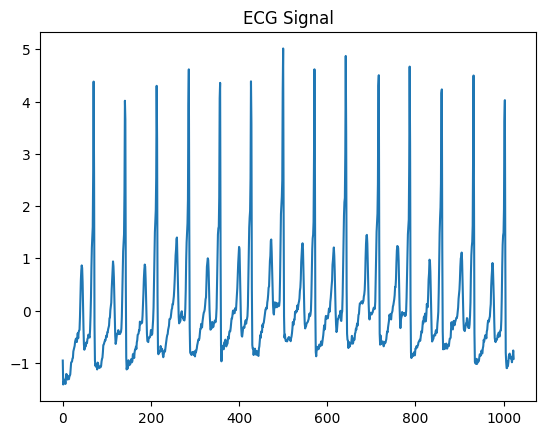

In [26]:
# 将信号重采样为128Hz
old_fs = record.fs
new_fs = 128
data_resampled = resample_poly(signal, new_fs, old_fs)

# 打印原始信号和重采样后的信号的长度和采样率
print('Original signal length:', len(signal), 'samples')
print('Original sampling rate:', old_fs, 'Hz')
print('Resampled signal length:', len(data_resampled), 'samples')
print('Resampled sampling rate:', new_fs, 'Hz')
# 绘制波形
plt.plot(data_resampled[0:2000])
plt.title("ECG Signal")
plt.show()

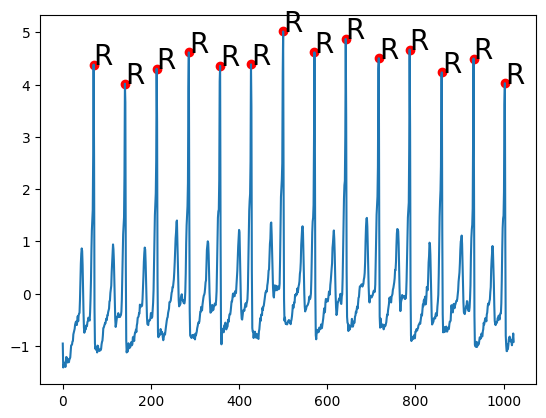

In [29]:
index2 = checkR(data_resampled)
# 检查R波检测是否正确
plt.figure()
plt.plot(data_resampled)
for i in range(len(index2)):
    plt.scatter(index2[i], data_resampled[index2[i]],c='r')
    plt.annotate('R',(index2[i], data_resampled[index2[i]]), fontsize=20)
plt.show()

length 14
['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


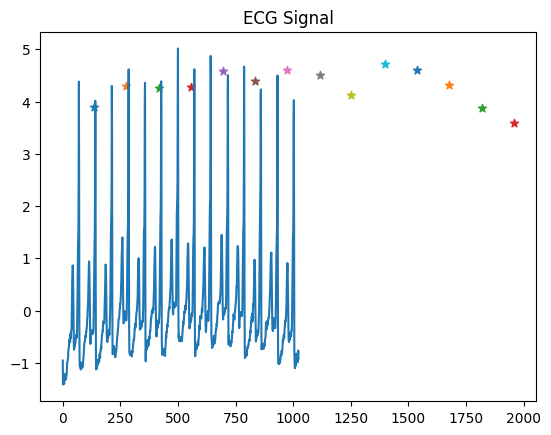

In [7]:
# 绘制波形
plt.plot(data_resampled[0:2000])
plt.title("ECG Signal")

# ======
# 读取annatations
signal_ann = wfdb.rdann("D:/学习/毕业设计/data/abnormal/04043", "qrs",sampfrom=0,sampto=2000)
print("length",len(signal_ann.sample))
# 将读取到的annatations的心拍绘制到心电图上
for index in signal_ann.sample:
    # print(index)
    plt.scatter(index, signal[index][0], marker="*")

# 并打印出改心拍标注的类型
print(signal_ann.symbol)
# print(signal_ann.aux_note)
plt.show()

[      1      93     182 ... 9533641 9533735 9533793]


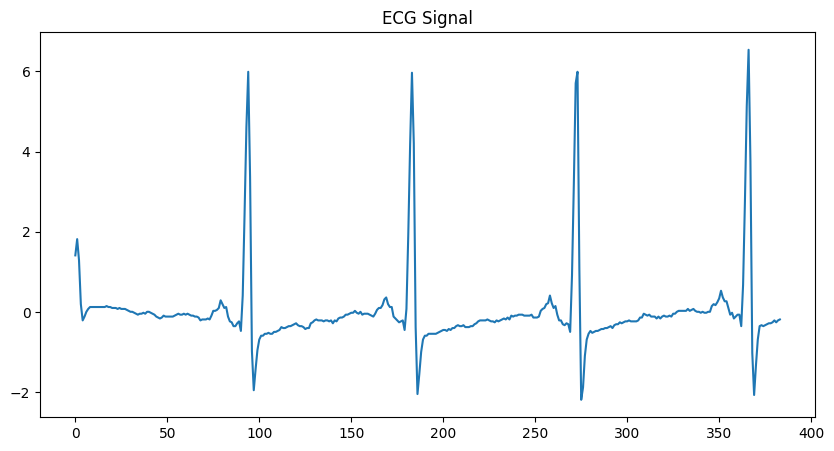

In [52]:
record = wfdb.rdrecord('D:/学习/毕业设计/data/normal/17453', # 文件所在路径
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       sampfrom=0,
                       sampto=384,
                       channel_names=['ECG1']) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal_ann = wfdb.rdann("D:/学习/毕业设计/data/normal/17453", "atr")
# 转为数字信号
signal = record.d_signal
signal = stats.zscore(signal)
print(signal_ann.sample)
# 绘制波形
plt.figure(num=None, figsize=(10, 5))
plt.plot(signal)
plt.title("ECG Signal")
plt.show()

In [9]:
res=signal[0:384].reshape(384)
singal_normal=pd.DataFrame(res)
singal_normal.to_csv('D:/学习/毕业设计/data/test_data/normal_sample1.csv',index=False)

In [34]:
record=wfdb.rdrecord('D:/学习/毕业设计/data/abnormal/04015',channel_names=['ECG1'])
data = record.p_signal.flatten()
annotation = wfdb.rdann('D:/学习/毕业设计/data/abnormal/04015', 'atr',
                        sampfrom=0,sampto=None,return_label_elements=['symbol'],
                        summarize_labels=False)
Rlocation = annotation.sample
Rclass = annotation.symbol
print(Rlocation)
print(Rclass)
print(annotation.aux_note)

[     30  102584  119604  121773  122194  133348  166857 1096245 1098054
 1135296 1139595 1422436 1423548 1459277 1460416]
['+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+']
['(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N']


(9205760, 2)


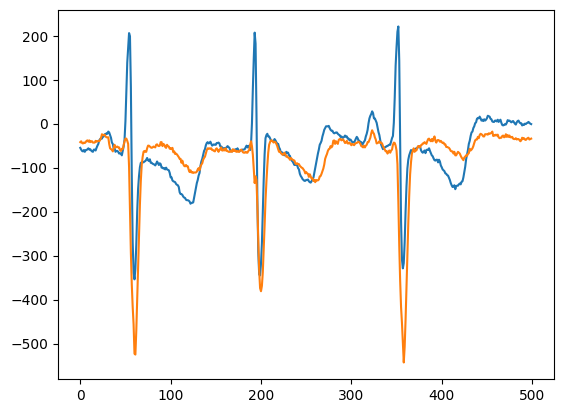

In [10]:
record=wfdb.rdrecord('D:/学习/毕业设计/data/abnormal/04015',physical=False)
data = record.d_signal
print(data.shape)
#data = stats.zscore(data)
plt.plot(data[0:500])
plt.show()

In [44]:
a = data.tolist()
res = []
for i in a:
    res.append(round(i,7))
print(res)

[-0.4025904, -0.3190423, -0.2911929, -0.332967, -0.3468917, -0.374741, -0.374741, -0.3190423, -0.2494189, -0.0823227, 0.0151501, 0.1543969, 0.2518696, 0.4885892, 0.7949322, 0.7670828, 0.7670828, 0.934179, 1.0873505, 1.2126726, 1.4354675, 1.5747143, 1.6025637, 1.630413, 1.5329403, 1.4633169, 1.546865, 1.630413, 1.546865, 1.4633169, 1.3797688, 1.3936935, 1.3936935, 1.3797688, 1.2962207, 1.3101454, 1.3379947, 1.4354675, 1.3658441, 1.1848233, 1.2962207, 1.3101454, 1.1848233, 1.0873505, 1.1291245, 1.2126726, 1.1708986, 1.0734258, 1.0177271, 1.0595011, 1.1569739, 1.2126726, 1.1291245, 1.0316518, 0.975953, 1.0038024, 0.934179, 0.8367062, 0.8088569, 1.1291245, 1.8253586, 2.7026135, 3.5380943, 4.1090063, 3.6912658, 1.588639, -1.0709751, -2.8951083, -3.6191917, -3.605267, -3.3685474, -2.8672589, -2.1014015, -1.1405985, -0.1797955, 0.321493, 0.4607398, 0.6139113, 0.7531581, 0.7253088, 0.7253088, 0.9202543, 0.892405, 0.7392335, 0.7392335, 0.7392335, 0.7392335, 0.9063296, 1.0455764, 0.8506309, 0.66

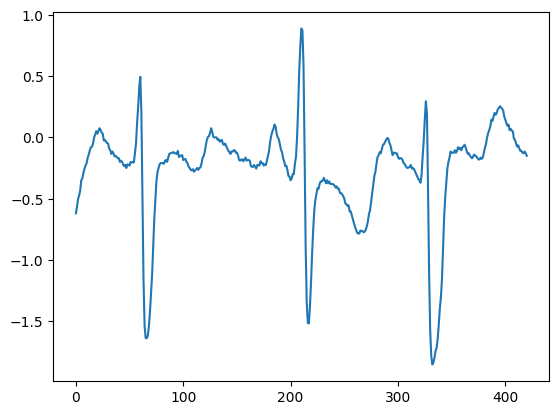

In [21]:
record=wfdb.rdrecord('D:/学习/毕业设计/data/abnormal/04015',channel_names=['ECG1'],sampfrom=121773,sampto=122194)
data = record.p_signal.flatten()
plt.plot(data)
plt.show()

In [31]:
record=wfdb.rdrecord('D:/学习/毕业设计/data/normal/16265',channel_names=['ECG1'])
data = record.p_signal.flatten()
annotation = wfdb.rdann('D:/学习/毕业设计/data/normal/16265', 'atr',
                        sampfrom=0,sampto=None,return_label_elements=['symbol'],
                        summarize_labels=False)
Rlocation = annotation.sample
Rclass = annotation.symbol
print(Rlocation)
print(Rclass)
print(annotation.aux_note)

[       1       52      129 ... 10247715 10247823 10247936]
['|', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [30]:
def getDataSet_abnormal(X_data, Y_data, flag):
    # 读取心电数据记录
    record = wfdb.rdrecord('D:/学习/毕业设计/data/abnormal/04015', channel_names=['ECG1'])
    data = record.p_signal.flatten()
    # data1 = filtering(data, record)  # 低通滤波
    # data2 = wavelet_denoising(data=data1)  # 小波变换
    res_data = stats.zscore(data)

    # 获取心电数据记录中R波的位置和对应的标签
    annotation = wfdb.rdann('D:/学习/毕业设计/data/abnormal/04015', 'atr')
    Rlocation = annotation.sample

    # 获取标记符号列表
    symbol_list = annotation.aux_note

    # 查找所有包含N标记的注释区间
    N_ranges = []
    N_start = None
    for i, symbol in enumerate(symbol_list):
        if symbol == '(N' and N_start is None:
            N_start = Rlocation[i]
        elif symbol != '(N' and N_start is not None:
            N_end = Rlocation[i]
            N_ranges.append((N_start, N_end))
            N_start = None

    # 如果最后一个注释是N，需要手动添加其结束位置
    if N_start is not None:
        N_end = len(res_data)
        N_ranges.append((N_start, N_end))

    # 输出找到的N区间的数量
    # print('Found %d N segments.' % len(N_ranges))

    # 从正常位置中找到R峰
    for start, end in N_ranges:
        x_ann = wfdb.rdann('D:/学习/毕业设计/data/abnormal/04015', 'qrs', sampfrom=start, sampto=end)
        Rlocation_N = x_ann.sample
        i = 5
        j = len(Rlocation_N) - 10
        while i < j:
            tmp_data = res_data[Rlocation_N[i]-100:Rlocation_N[i]+200]
            X_data.append(tmp_data)
            Y_data.append(flag)
            i += 1
    return 


In [31]:
X_data=[]
Y_data=[]
getDataSet_abnormal(X_data,Y_data,1)
print(len(X_data))

43362


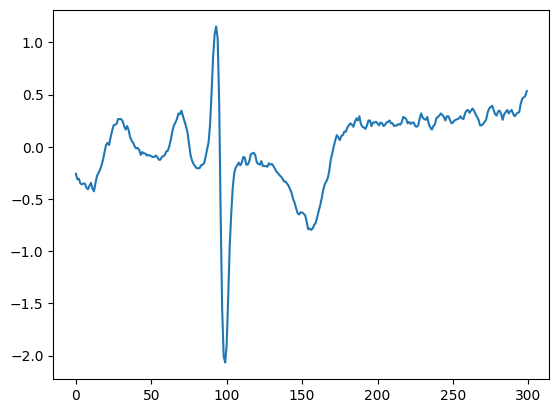

In [35]:
plt.plot(X_data[155])
plt.show()

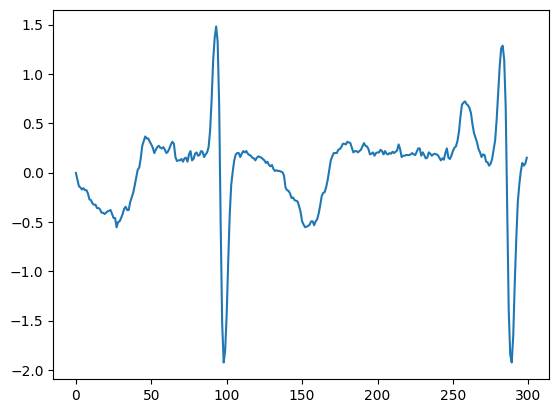

In [36]:
plt.plot(X_data[111])
plt.show()

# 数据不平衡问题

In [2]:
import pandas as pd
before= np.load('y_train_before.npy')
before=pd.DataFrame(before)
per_class=before.value_counts()
print(per_class)

0.0    477573
1.0    154237
dtype: int64


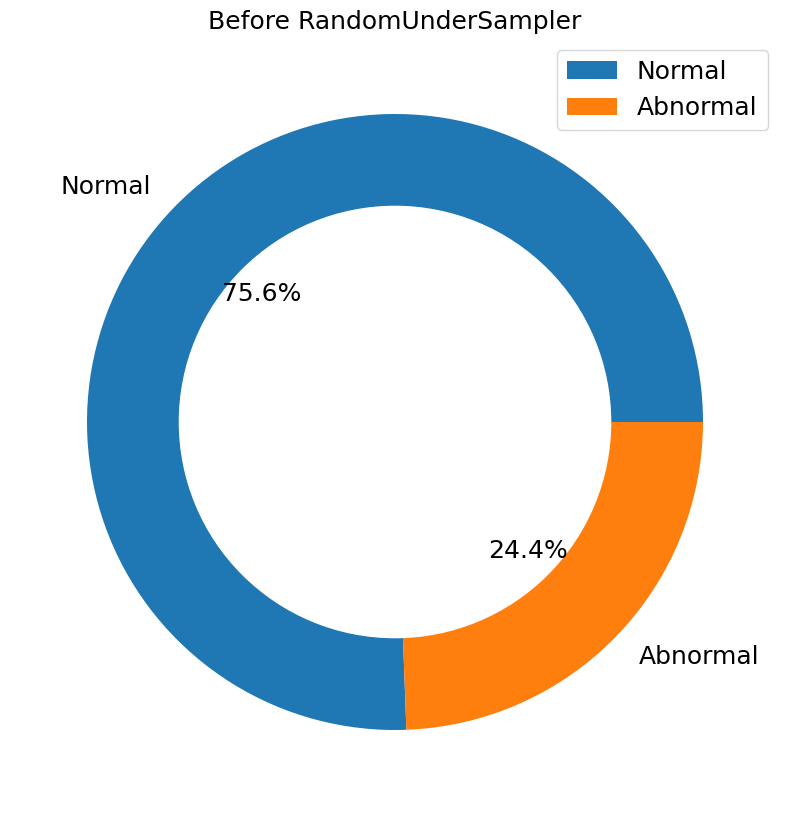

In [10]:
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%',textprops={'fontsize': 18})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Before RandomUnderSampler',fontsize=18)
plt.legend(fontsize=18)
plt.show()

0.0    154237
1.0    154237
dtype: int64


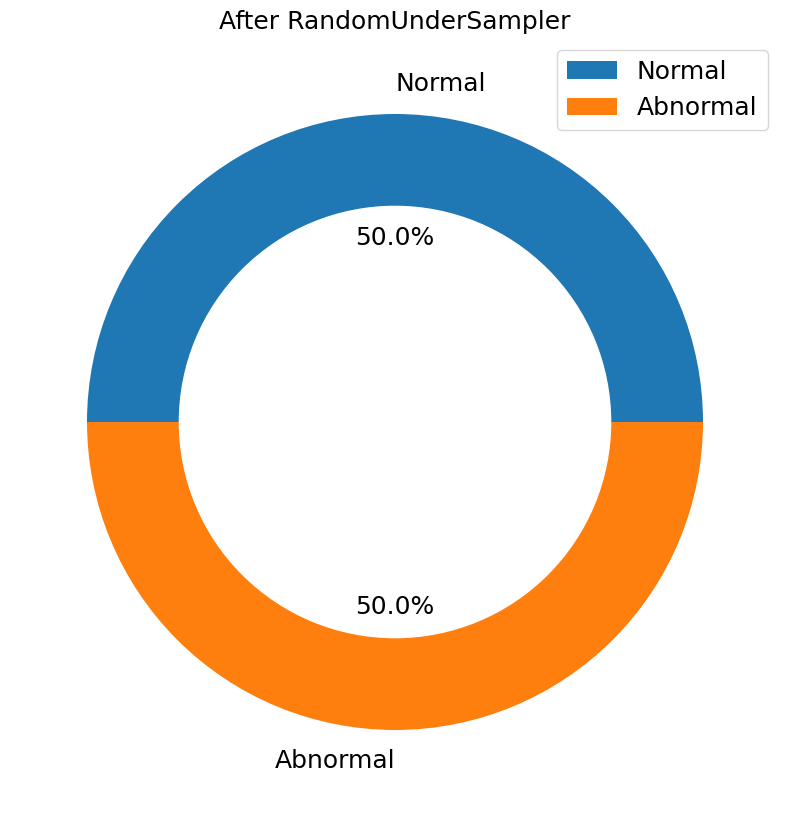

In [9]:
after=np.load('y_train_after.npy')
after=pd.DataFrame(after)
per_class2=after.value_counts()
print(per_class2)
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class2, labels=['Normal', 'Abnormal'], colors=['tab:blue','tab:orange'],autopct='%1.1f%%',textprops={'fontsize': 18})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('After RandomUnderSampler',fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [6]:
normal_set=['16265', '16272', '16273', '16420', '16483', '16539', '16773', 
            '16786', '16795', '17052', '17453', '18177', '18184', '19088', '19090', '19093', '19140', '19830']
abnormal_set=['04015', '04043', '04048', '04126', '04746', '04908', '04936', 
              '05091', '05121', '05261', '06426', '06453', '06995', '07162',
                '07859', '07879', '07910', '08215', '08219', '08378', '08405', '08434', '08455']
normal_set=np.array(normal_set)
abnormal_set=np.array(abnormal_set)

In [4]:
import numpy as np
shuffle_index_normal = np.random.permutation(len(normal_set))
# 测试集与训练集的长度
index_normal_test = shuffle_index_normal[:4]
index_normal_train = shuffle_index_normal[4:]
print(index_normal_test)
print(index_normal_train)

[ 0 17  5  7]
[ 2 11 15 14  3  4 10  1 16 13  6  8 12  9]


In [7]:
normal_set_test=normal_set[index_normal_test]
normal_set_train=normal_set[index_normal_train]
print(normal_set_test)
print(normal_set_train)

['16265' '19830' '16539' '16786']
['16273' '18177' '19093' '19090' '16420' '16483' '17453' '16272' '19140'
 '19088' '16773' '16795' '18184' '17052']


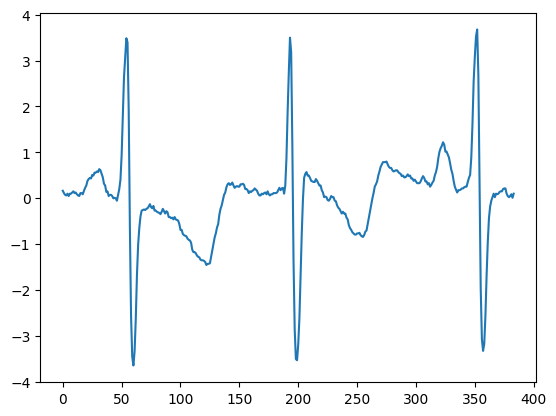

In [4]:
a=[0.159924735, 0.108961168, 0.070738493, 0.057997601, 0.096220276, 0.045256709, 0.096220276, 0.096220276, 0.12170206, 0.147183843, 0.108961168, 0.12170206, 0.083479384, 0.057997601, 0.045256709, 0.108961168, 0.108961168, 0.083479384, 0.159924735, 0.223629193, 0.27459276, 0.376519894, 0.41474257, 0.440224353, 0.427483461, 0.503928812, 0.49118792, 0.554892379, 0.554892379, 0.580374162, 0.56763327, 0.631337729, 0.605855946, 0.529410595, 0.452965245, 0.312815436, 0.27459276, 0.134442951, 0.147183843, 0.045256709, 0.070738493, 0.070738493, 0.045256709, -0.005706858, 0.007034034, -0.005706858, -0.056670425, 0.070738493, 0.19814741, 0.402001678, 0.937119131, 1.752536202, 2.631657732, 3.052107159, 3.485297478, 3.396111236, 1.930908686, -0.617269661, -2.566626097, -3.458488518, -3.649601894, -3.343820493, -2.643071447, -1.687504567, -1.024978197, -0.655492336, -0.400674502, -0.273265584, -0.260524692, -0.247783801, -0.260524692, -0.235042909, -0.222302017, -0.184079342, -0.133115775, -0.196820234, -0.222302017, -0.17133845, -0.273265584, -0.273265584, -0.298747368, -0.311488259, -0.324229151, -0.349710935, -0.298747368, -0.235042909, -0.286006476, -0.336970043, -0.286006476, -0.311488259, -0.413415393, -0.413415393, -0.438897177, -0.426156285, -0.46437896, -0.413415393, -0.46437896, -0.477119852, -0.489860744, -0.566306094, -0.693715012, -0.693715012, -0.782901254, -0.808383037, -0.821123929, -0.833864821, -0.884828388, -0.910310171, -0.923051063, -0.97401463, -1.126905331, -1.177868897, -1.177868897, -1.203350681, -1.254314248, -1.279796031, -1.292536923, -1.34350049, -1.356241382, -1.356241382, -1.368982274, -1.394464057, -1.458168516, -1.432686732, -1.432686732, -1.41994584, -1.279796031, -1.152387114, -0.999496413, -0.859346604, -0.770160362, -0.642751445, -0.566306094, -0.362451826, -0.235042909, -0.158597559, -0.043929533, 0.070738493, 0.12170206, 0.236370085, 0.300074544, 0.325556327, 0.287333652, 0.300074544, 0.338297219, 0.27459276, 0.223629193, 0.249110977, 0.261851869, 0.249110977, 0.249110977, 0.300074544, 0.300074544, 0.312815436, 0.287333652, 0.19814741, 0.19814741, 0.172665627, 0.108961168, 0.147183843, 0.134442951, 0.159924735, 0.172665627, 0.210888302, 0.185406518, 0.159924735, 0.096220276, 0.057997601, 0.057997601, 0.096220276, 0.083479384, 0.108961168, 0.12170206, 0.083479384, 0.147183843, 0.083479384, 0.057997601, 0.083479384, 0.083479384, 0.108961168, 0.108961168, 0.108961168, 0.12170206, 0.172665627, 0.223629193, 0.172665627, 0.210888302, 0.223629193, 0.096220276, 0.27459276, 0.873414672, 1.879945119, 2.746325757, 3.49803837, 3.179516076, 1.15371429, -1.368982274, -2.859666607, -3.509452085, -3.534933869, -3.190929792, -2.617589664, -1.700245459, -0.770160362, -0.031188641, 0.440224353, 0.529410595, 0.56763327, 0.49118792, 0.49118792, 0.440224353, 0.376519894, 0.363779003, 0.351038111, 0.351038111, 0.41474257, 0.376519894, 0.325556327, 0.27459276, 0.27459276, 0.172665627, 0.12170206, 0.019774926, 0.032515817, 0.019774926, -0.043929533, -0.056670425, -0.018447749, 0.045256709, 0.019774926, 0.019774926, -0.056670425, -0.069411316, -0.158597559, -0.209561126, -0.235042909, -0.286006476, -0.336970043, -0.298747368, -0.336970043, -0.336970043, -0.426156285, -0.46437896, -0.591787878, -0.655492336, -0.693715012, -0.744678578, -0.770160362, -0.795642145, -0.795642145, -0.770160362, -0.770160362, -0.75741947, -0.808383037, -0.833864821, -0.846605712, -0.808383037, -0.731937687, -0.706455903, -0.566306094, -0.413415393, -0.298747368, -0.145856667, -0.005706858, 0.108961168, 0.249110977, 0.300074544, 0.363779003, 0.49118792, 0.580374162, 0.682301296, 0.733264863, 0.78422843, 0.78422843, 0.78422843, 0.796969322, 0.733264863, 0.682301296, 0.656819513, 0.656819513, 0.605855946, 0.580374162, 0.593115054, 0.605855946, 0.605855946, 0.56763327, 0.542151487, 0.529410595, 0.478447028, 0.49118792, 0.452965245, 0.452965245, 0.478447028, 0.516669703, 0.478447028, 0.49118792, 0.427483461, 0.427483461, 0.376519894, 0.402001678, 0.363779003, 0.325556327, 0.325556327, 0.325556327, 0.363779003, 0.427483461, 0.478447028, 0.440224353, 0.363779003, 0.363779003, 0.300074544, 0.325556327, 0.249110977, 0.287333652, 0.338297219, 0.376519894, 0.49118792, 0.56763327, 0.682301296, 0.873414672, 1.013564481, 1.090009832, 1.140973398, 1.217418749, 1.166455182, 1.013564481, 1.013564481, 0.949860022, 0.886155564, 0.758746646, 0.618596837, 0.529410595, 0.376519894, 0.249110977, 0.185406518, 0.12170206, 0.172665627, 0.172665627, 0.185406518, 0.210888302, 0.210888302, 0.236370085, 0.249110977, 0.249110977, 0.351038111, 0.440224353, 0.503928812, 0.886155564, 1.612386393, 2.542471489, 3.077588942, 3.523520153, 3.676410854, 2.682621299, 0.249110977, -1.967804185, -3.076261766, -3.331079601, -3.1781889, -2.566626097, -1.687504567, -0.961273738, -0.438897177, -0.184079342, -0.056670425, 0.019774926, 0.096220276, 0.019774926, 0.096220276, 0.083479384, 0.096220276, 0.134442951, 0.147183843, 0.147183843, 0.19814741, 0.210888302, 0.210888302, 0.096220276, 0.045256709, 0.019774926, 0.045256709, 0.083479384, 0.007034034, 0.096220276]
plt.plot(a)
plt.show()

In [2]:
import numpy as np
d = np.array([4,3,2,1])
d = np.pad(d,(0,3),'constant',constant_values=(0,0))
print(d)


[4 3 2 1 0 0 0]
